<a href="https://colab.research.google.com/github/AsminiKOD/ClientPredicting/blob/NeuralNetworks/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# Load the pre-processed dataset
data = pd.read_csv('bank-scaled.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = (data['y'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy=0.7, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=64, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_balanced.shape[1]
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='tuner_dir',
    project_name='bank_model_tuning'
)

# Early stopping to avoid overfitting during search
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(X_train_balanced, y_train_balanced, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Retrieve the best hyperparameters and build the final model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the final model with the best hyperparameters
model.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Training Report
y_train_pred_prob = model.predict(X_train_balanced)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
train_auc = roc_auc_score(y_train_balanced, y_train_pred_prob)

print("Training Set Report:")
print(classification_report(y_train_balanced, y_train_pred))
print(f"Training ROC AUC: {train_auc:.4f}")

# Testing Report
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

print("Testing Set Report:")
print(classification_report(y_test, y_test_pred))
print(f"Testing ROC AUC: {test_auc:.4f}")


Trial 68 Complete [00h 00m 37s]
val_accuracy: 0.875

Best val_accuracy So Far: 0.8881173133850098
Total elapsed time: 00h 25m 08s

Search: Running Trial #69

Value             |Best Value So Far |Hyperparameter
256               |192               |units_1
0.1               |0.5               |dropout_1
96                |64                |units_2
0.4               |0.5               |dropout_2
0.01              |0.01              |learning_rate
10                |10                |tuner/epochs
4                 |4                 |tuner/initial_epoch
2                 |3                 |tuner/bracket
1                 |2                 |tuner/round
0064              |0039              |tuner/trial_id

Epoch 5/10
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7478 - loss: 0.5355 - val_accuracy: 0.8544 - val_loss: 0.5350
Epoch 6/10
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7431 - loss: 0.5221 - val_accuracy: 0.7665 - val_loss: 0.4661
Epoch 7/10
1458/1458 ━━━

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping

# Load the pre-processed dataset
data = pd.read_csv('bank-scaled.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = (data['y'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy=0.6, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Build the neural network with more layers and dropout
model = Sequential([
    Dense(128, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a custom learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train_balanced, y_train_balanced, epochs=60, batch_size=64 , verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Training Report
y_train_pred_prob = model.predict(X_train_balanced)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
train_auc = roc_auc_score(y_train_balanced, y_train_pred_prob)

print("Training Set Report:")
print(classification_report(y_train_balanced, y_train_pred))
print(f"Training ROC AUC: {train_auc:.4f}")

# Testing Report
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

print("Testing Set Report:")
print(classification_report(y_test, y_test_pred))
print(f"Testing ROC AUC: {test_auc:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

1372/1372 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Set Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83     27438
           1       0.76      0.59      0.67     16462

    accuracy                           0.78     43900
   macro avg       0.77      0.74      0.75     43900
weighted avg       0.77      0.78      0.77     43900

Training ROC AUC: 0.8188
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testing Set Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      6859
           1       0.42      0.60      0.49       917

    accuracy                           0.86      7776
   macro avg       0.68      0.74      0.70      7776
weighted avg       0.88      0.86      0.87      7776

Testing ROC AUC: 0.7952


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# Load the pre-processed dataset
data = pd.read_csv('bank-scaled.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = (data['y'] > 0).astype(int)

# Feature selection (optional, use mutual information to select top features)
selected_features = X.columns[mutual_info_classif(X, y) > 0.01]
X = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy=0.6, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Convert `y_train_balanced` to numpy array
y_train_balanced = np.array(y_train_balanced)

# Scale the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Calculate class weights using numpy array
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
class_weights = dict(enumerate(class_weights))

# Build a simplified neural network
model = Sequential([
    Dense(128, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

for train_idx, val_idx in kfold.split(X_train_balanced, y_train_balanced):
    X_train_cv, X_val_cv = X_train_balanced[train_idx], X_train_balanced[val_idx]
    y_train_cv, y_val_cv = y_train_balanced[train_idx], y_train_balanced[val_idx]

    # Train the model with early stopping and class weights
    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0,
              validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping],
              class_weight=class_weights)

    # Evaluate on the validation fold
    y_val_pred_prob = model.predict(X_val_cv)
    val_auc = roc_auc_score(y_val_cv, y_val_pred_prob)
    cv_results.append(val_auc)

# Training Report
y_train_pred_prob = model.predict(X_train_balanced)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
train_auc = roc_auc_score(y_train_balanced, y_train_pred_prob)

print("Training Set Report:")
print(classification_report(y_train_balanced, y_train_pred))
print(f"Training ROC AUC: {train_auc:.4f}")

# Test report
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

print("Testing Set Report:")
print(classification_report(y_test, y_test_pred))
print(f"Testing ROC AUC: {test_auc:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cross-Validation AUC Scores: [0.7827054842289286, 0.7822573065634864, 0.7948586986651978, 0.797317165919767, 0.7902367692269462]
Average CV AUC: 0.7895
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Set Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     27438
           1       0.73      0.62      0.67     16462

    accuracy                           0.77     43900
   macro avg       0.76      0.74      0.75     43900
weighted avg       0.77      0.77      0.77     43900

Training ROC AUC: 0.7938
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Testing Set Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6859
           1       0.38      0.63      0.48       917

  

###Visualization

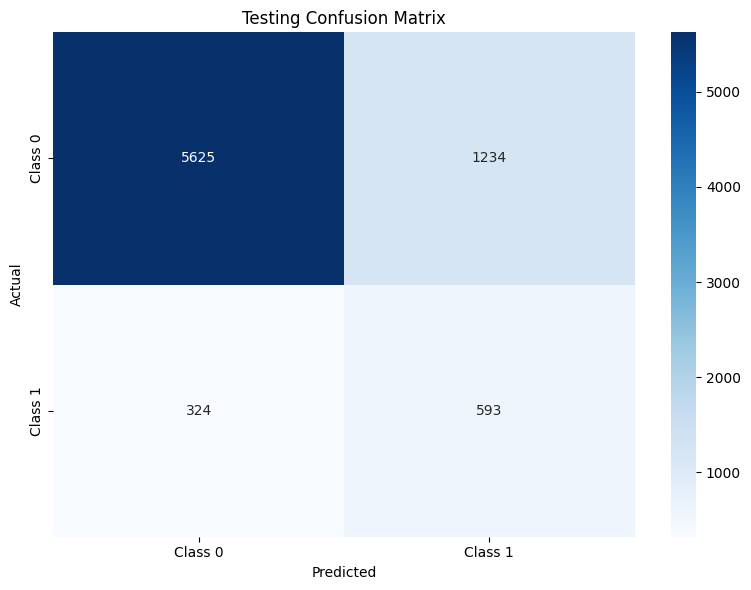

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for training data
test_cm = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
